In [9]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

df = pd.read_excel("../데이터자료/join_data.xlsx",index_col=0)
df=df[['종가_ex','1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스','M1_스왑포인트', 'Mid_ndf']]


df

,종가_ex,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,...,국고10년,통안364일,통안2년,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,M1_스왑포인트,Mid_ndf
열1,,,,,,,,,,,,,,,,,,,,,
0,1126.5,2.850,2.740,2.740,2.770,2.910,2.09,1.815,1.81,1.72,...,3.14,2.80,2.83,-76.0,-92.5,-93.0,-105.0,-108.0,260,1132.25
1,1131.7,2.820,2.690,2.690,2.720,2.860,2.08,1.845,1.85,1.76,...,3.10,2.77,2.78,-74.0,-84.5,-84.0,-96.0,-99.0,250,1134.00
2,1134.8,2.790,2.660,2.660,2.690,2.840,2.07,1.830,1.83,1.68,...,3.03,2.75,2.77,-72.0,-83.0,-83.0,-101.0,-112.0,240,1138.00
3,1129.0,2.810,2.680,2.680,2.710,2.850,2.07,1.805,1.80,1.64,...,3.03,2.76,2.78,-74.0,-87.5,-88.0,-107.0,-117.0,240,1128.50
4,1128.8,2.820,2.680,2.680,2.720,2.870,2.09,1.820,1.80,1.57,...,3.03,2.75,2.77,-73.0,-86.0,-88.0,-115.0,-127.0,250,1129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1313.7,3.165,3.235,3.205,3.125,2.965,2.55,2.730,2.71,2.51,...,3.21,2.98,3.09,-61.5,-50.5,-49.5,-61.5,-60.5,-60,1309.85
2456,1307.6,3.155,3.215,3.175,3.095,2.935,2.56,2.700,2.68,2.49,...,3.18,2.99,3.09,-59.5,-51.5,-49.5,-60.5,-59.5,-70,1311.00
2457,1313.3,3.145,3.165,3.115,3.035,2.875,2.57,2.690,2.67,2.48,...,3.12,3.01,3.08,-57.5,-47.5,-44.5,-55.5,-54.5,-55,1310.50


In [10]:
#스케일링 전 샤피로 테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 3.767033004433394e-14
1Y_Mid_irs 1.0048882541111747e-29
2Y_Mid_irs 4.698681116411433e-26
3Y_Mid_irs 1.015246605427624e-25
5Y_Mid_irs 1.6300730853028188e-25
10Y_Mid_irs 1.5817474662489796e-25
1Y_Mid_crs 3.5140968560248224e-20
2Y_Mid_crs 7.997604024275074e-19
3Y_Mid_crs 1.4050880314074853e-16
5Y_Mid_crs 5.344354380701008e-14
10Y_Mid_crs 4.294561651148289e-15
국고1년 3.5205885031308223e-29
국고3년 4.1585918856906525e-24
국고5년 3.3317193233211136e-22
국고10년 3.155954408320178e-24
통안364일 6.527109952176991e-28
통안2년 2.819187715729065e-25
1Y_베이시스 2.2483044200381074e-35
2Y_베이시스 7.306067105819648e-21
3Y_베이시스 3.8390240332184766e-22
5Y_베이시스 1.092904705480689e-32
10Y_베이시스 9.066401064181566e-43
M1_스왑포인트 2.1736356212854807e-24
Mid_ndf 2.975288608151813e-14


In [11]:
#스케일링 전 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)
        

종가_ex 0.0
1Y_Mid_irs 0.0
2Y_Mid_irs 0.0
3Y_Mid_irs 0.0
5Y_Mid_irs 0.0
10Y_Mid_irs 0.0
1Y_Mid_crs 0.0
2Y_Mid_crs 0.0
3Y_Mid_crs 0.0
5Y_Mid_crs 0.0
10Y_Mid_crs 0.0
국고1년 0.0
국고3년 0.0
국고5년 0.0
국고10년 0.0
통안364일 0.0
통안2년 0.0
1Y_베이시스 0.0
2Y_베이시스 0.0
3Y_베이시스 0.0
5Y_베이시스 0.0
10Y_베이시스 0.0
M1_스왑포인트 0.0
Mid_ndf 0.0


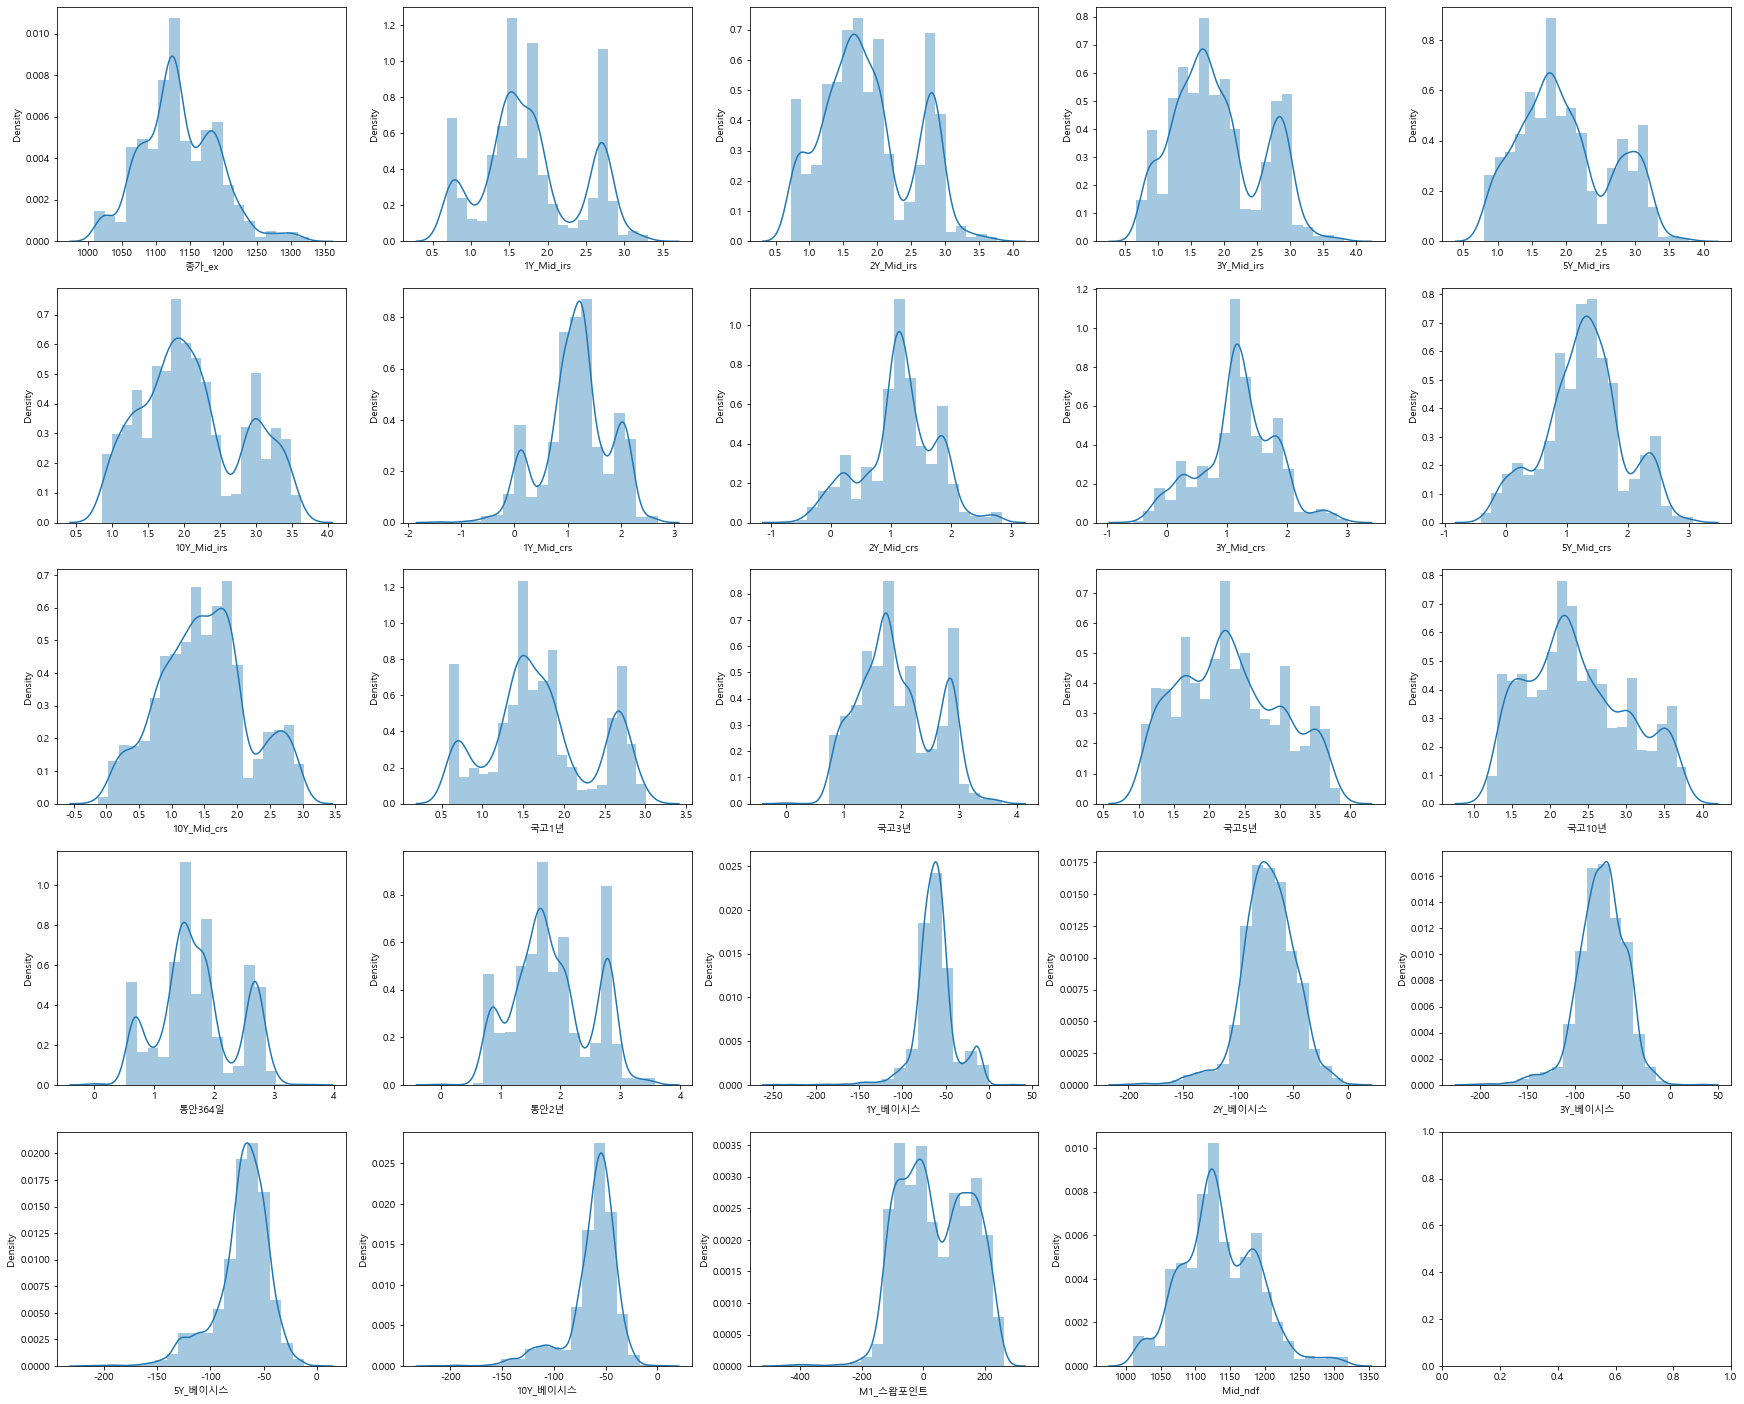

In [12]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

종가_ex
1Y_Mid_irs
2Y_Mid_irs
3Y_Mid_irs
5Y_Mid_irs
10Y_Mid_irs
1Y_Mid_crs
2Y_Mid_crs
3Y_Mid_crs
5Y_Mid_crs
10Y_Mid_crs
국고1년
국고3년
국고5년
국고10년
통안364일
통안2년
1Y_베이시스
2Y_베이시스
3Y_베이시스
5Y_베이시스
10Y_베이시스
M1_스왑포인트
Mid_ndf


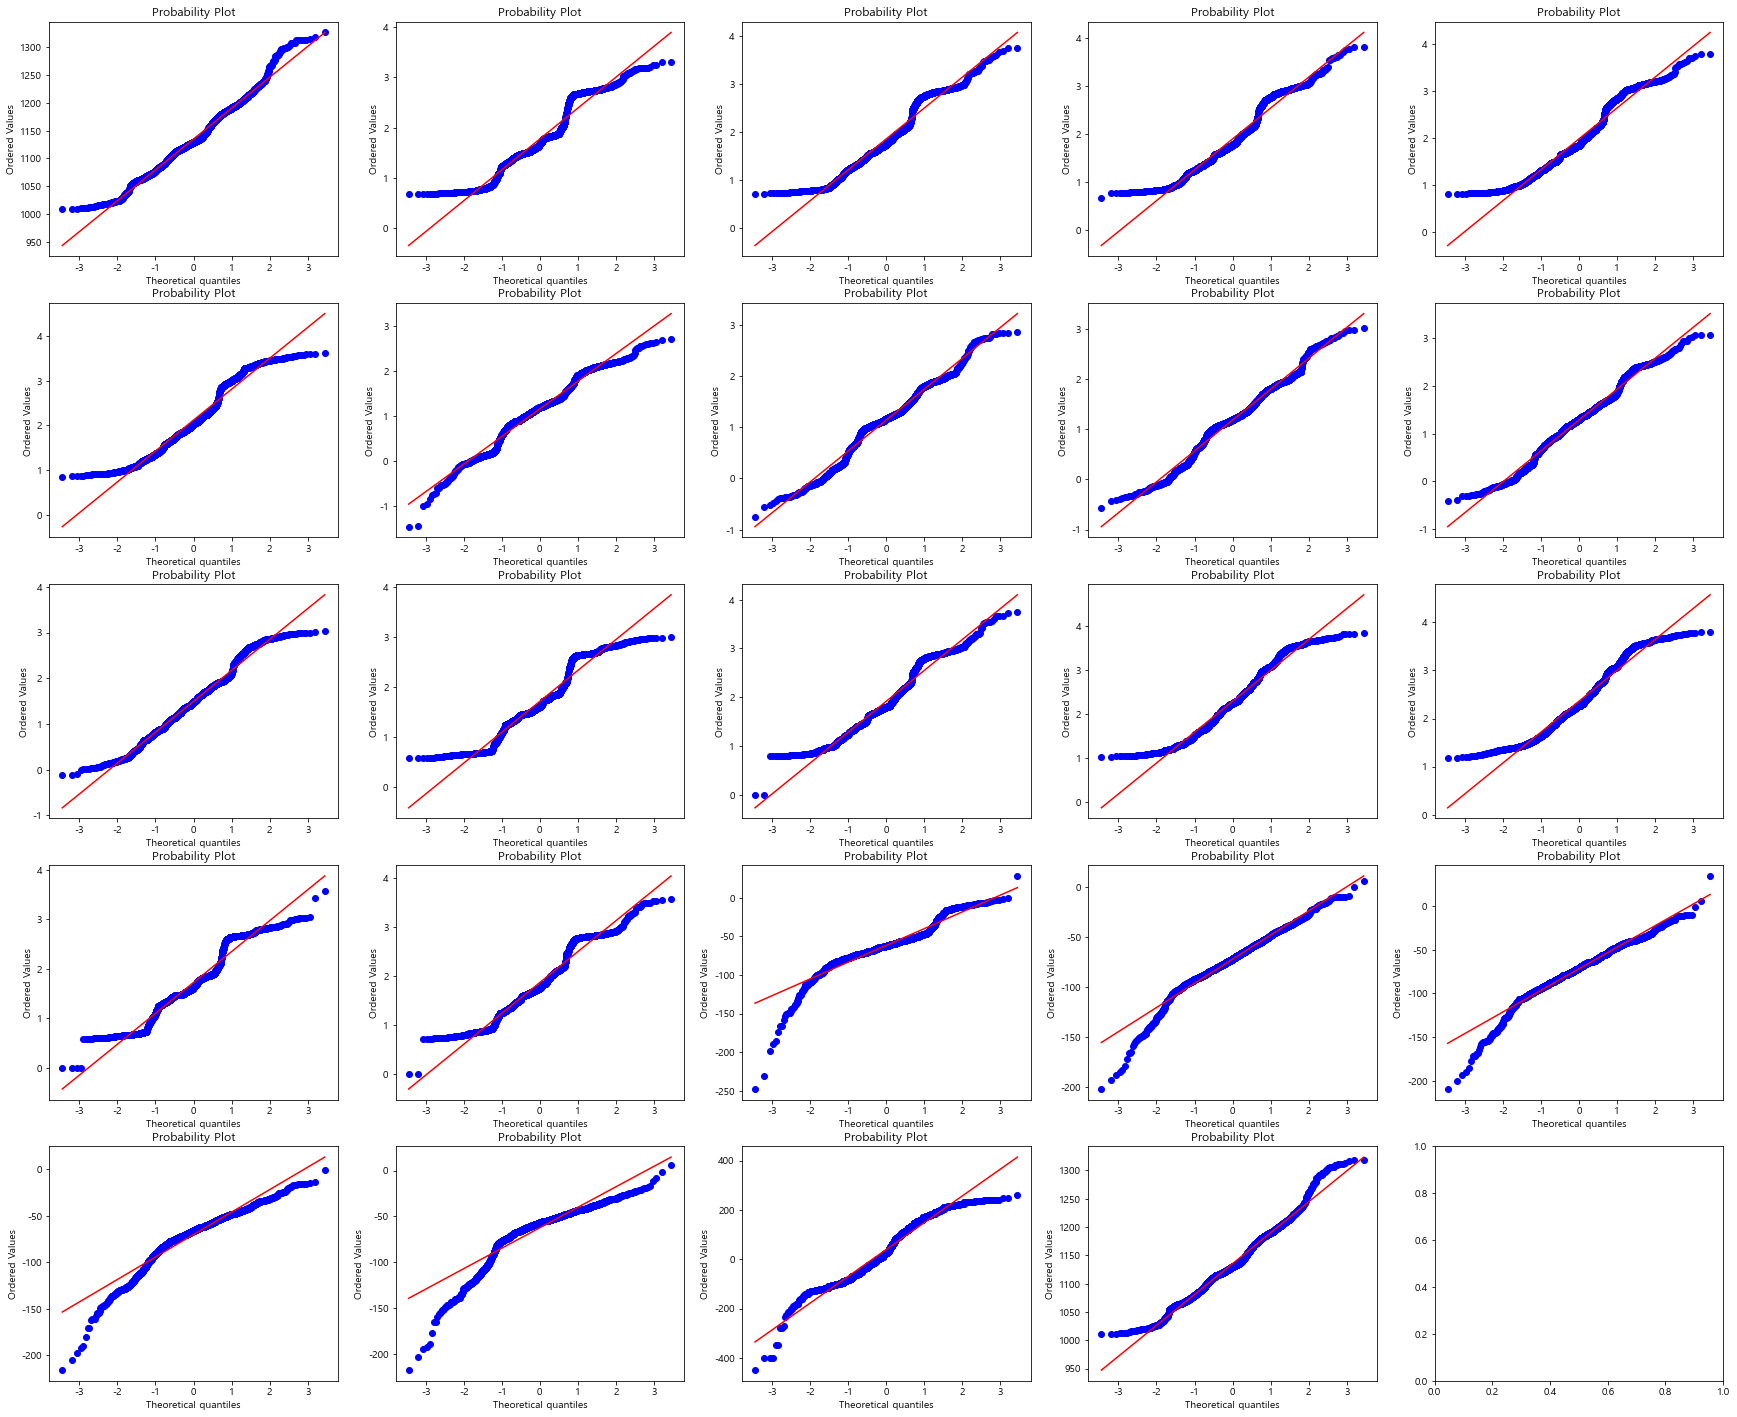

In [13]:
## histogram
col_n = 5
row_n = 5

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)
    

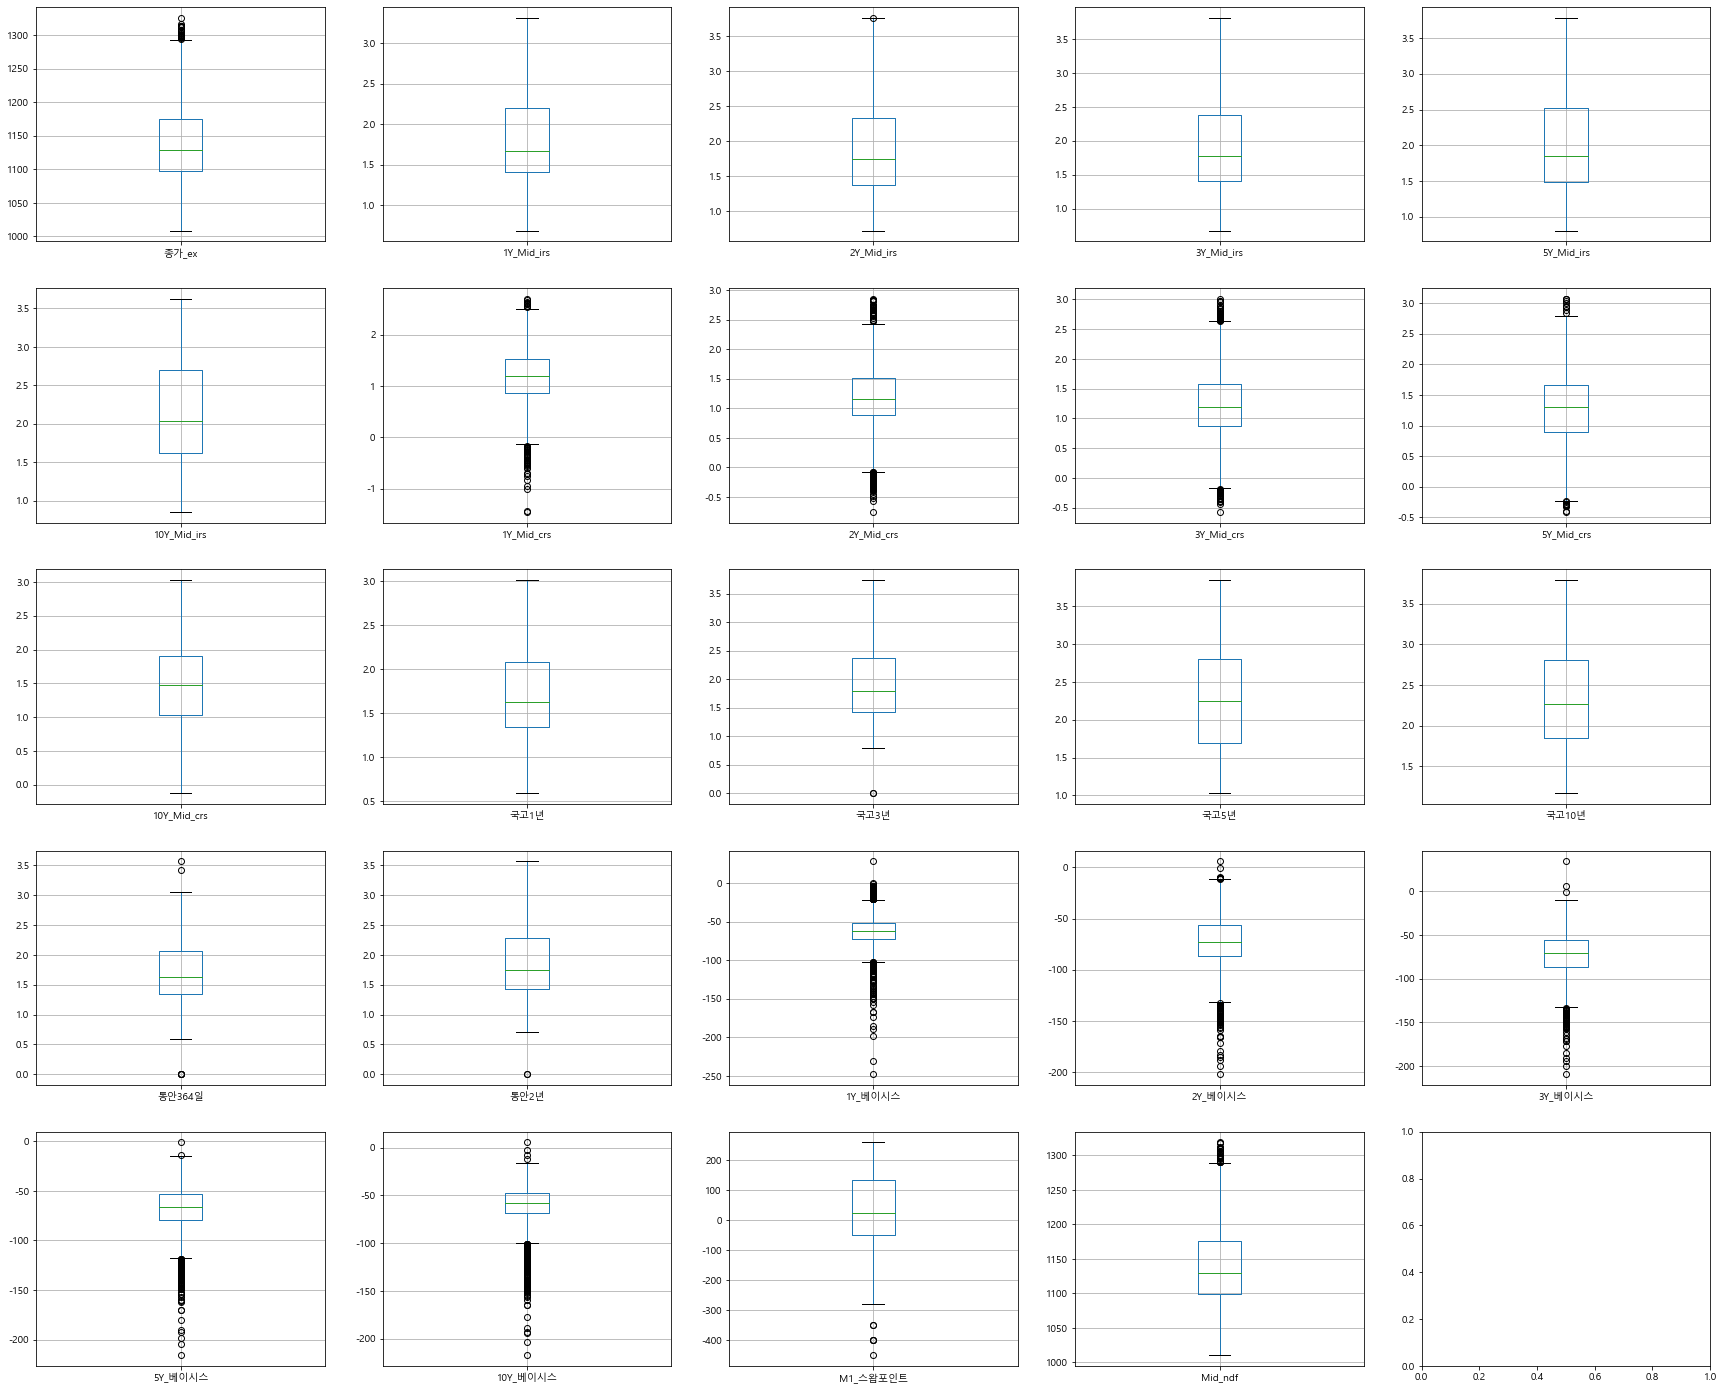

In [14]:
# 각각의 그래프에 대한 해석이 필요했음

from matplotlib import rc 
col_n = 5
row_n = 5

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    df.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [15]:
# 정규성 없는거 확인 
# 스케일링 코드
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

scaler.fit(df)
df_Data_scaled= scaler.transform(df)
df_scaled = pd.DataFrame (data = df_Data_scaled, columns=df.columns)
df_scaled

,종가_ex,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,...,국고10년,통안364일,통안2년,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,M1_스왑포인트,Mid_ndf
0,-0.150806,1.698499,1.338892,1.283437,1.174219,1.124144,1.504029,1.113974,1.018950,0.669311,...,1.198149,1.685954,1.508426,-0.625745,-0.820773,-0.839954,-1.393411,-1.897293,1.997906,-0.056053
1,-0.057344,1.650985,1.262631,1.207185,1.099480,1.053058,1.487867,1.163299,1.083532,0.730623,...,1.136882,1.638991,1.430584,-0.537507,-0.492974,-0.480805,-1.033964,-1.523564,1.907434,-0.024147
2,-0.001626,1.603471,1.216874,1.161434,1.054636,1.024624,1.471705,1.138637,1.051241,0.607999,...,1.029664,1.607682,1.415016,-0.449269,-0.431511,-0.440899,-1.233657,-2.063395,1.816961,0.048782
3,-0.105872,1.635147,1.247378,1.191935,1.084532,1.038841,1.471705,1.097532,1.002804,0.546687,...,1.029664,1.623336,1.430584,-0.537507,-0.615899,-0.640427,-1.473288,-2.271023,1.816961,-0.124423
4,-0.109467,1.650985,1.247378,1.191935,1.099480,1.067275,1.504029,1.122195,1.002804,0.439391,...,1.029664,1.607682,1.415016,-0.493388,-0.554436,-0.640427,-1.792797,-2.686278,1.907434,-0.115307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,3.213831,2.197399,2.093880,1.992574,1.704865,1.202338,2.247491,2.618410,2.472060,1.880225,...,1.305367,1.967736,1.913203,0.013980,0.900175,0.895936,0.343919,0.075168,-0.897226,3.181963
2456,3.104193,2.181561,2.063375,1.946823,1.660022,1.159687,2.263654,2.569084,2.423623,1.849569,...,1.259417,1.983390,1.913203,0.102218,0.859200,0.895936,0.383857,0.116693,-0.987699,3.202930
2457,3.206641,2.165723,1.987114,1.855321,1.570335,1.074384,2.279816,2.552642,2.407478,1.834241,...,1.167516,2.014699,1.897634,0.190456,1.023100,1.095463,0.583550,0.324321,-0.851990,3.193814
2458,2.897497,2.213237,2.048123,1.931573,1.645074,1.173904,2.344465,2.618410,2.472060,1.880225,...,1.290050,2.046008,1.944339,0.234575,1.023100,1.055558,0.503673,0.116693,-0.942463,3.111769


In [16]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df_scaled.columns:
    a = stats.shapiro(df_scaled[i])
    p = a.pvalue   
    print(i,p)

종가_ex 3.771983064977148e-14
1Y_Mid_irs 1.0047903777495478e-29
2Y_Mid_irs 4.6992505753773894e-26
3Y_Mid_irs 1.0114466377952711e-25
5Y_Mid_irs 1.6291295337044646e-25
10Y_Mid_irs 1.5816053480265234e-25
1Y_Mid_crs 3.5046705513334125e-20
2Y_Mid_crs 8.022264346286811e-19
3Y_Mid_crs 1.4050880314074853e-16
5Y_Mid_crs 5.3476313817673454e-14
10Y_Mid_crs 4.293528694469112e-15
국고1년 3.5174200474457515e-29
국고3년 4.157947386331087e-24
국고5년 3.3338819381611227e-22
국고10년 3.1518497678150866e-24
통안364일 6.51638926314156e-28
통안2년 2.826366103447543e-25
1Y_베이시스 2.2483311097291783e-35
2Y_베이시스 7.306132537098571e-21
3Y_베이시스 3.840268035311574e-22
5Y_베이시스 1.0925441225885743e-32
10Y_베이시스 9.052388079538318e-43
M1_스왑포인트 2.1726824800967475e-24
Mid_ndf 2.98007129498519e-14


In [17]:
#스케일링후 ks테스트
for i in df_scaled.columns:
    a = kstest(df_scaled[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 2.5236000846912044e-10
1Y_Mid_irs 2.621650233853012e-32
2Y_Mid_irs 3.7667949265879063e-19
3Y_Mid_irs 1.1450077669784538e-16
5Y_Mid_irs 2.0470984584703316e-15
10Y_Mid_irs 6.134031365206461e-15
1Y_Mid_crs 1.535034029429353e-11
2Y_Mid_crs 9.16983968397658e-24
3Y_Mid_crs 4.326162241676219e-18
5Y_Mid_crs 0.00011285850062669016
10Y_Mid_crs 0.0001321611794099796
국고1년 1.5030961959630334e-25
국고3년 9.783609363311155e-21
국고5년 2.41711856473258e-06
국고10년 4.1291775391720236e-11
통안364일 1.3523420416217897e-24
통안2년 7.498902375526521e-20
1Y_베이시스 2.5907426188977395e-26
2Y_베이시스 1.7538914567441995e-05
3Y_베이시스 0.0006965548086071602
5Y_베이시스 3.7010924304937046e-31
10Y_베이시스 5.021952346839363e-54
M1_스왑포인트 1.44281065098456e-11
Mid_ndf 4.3192725598572885e-10


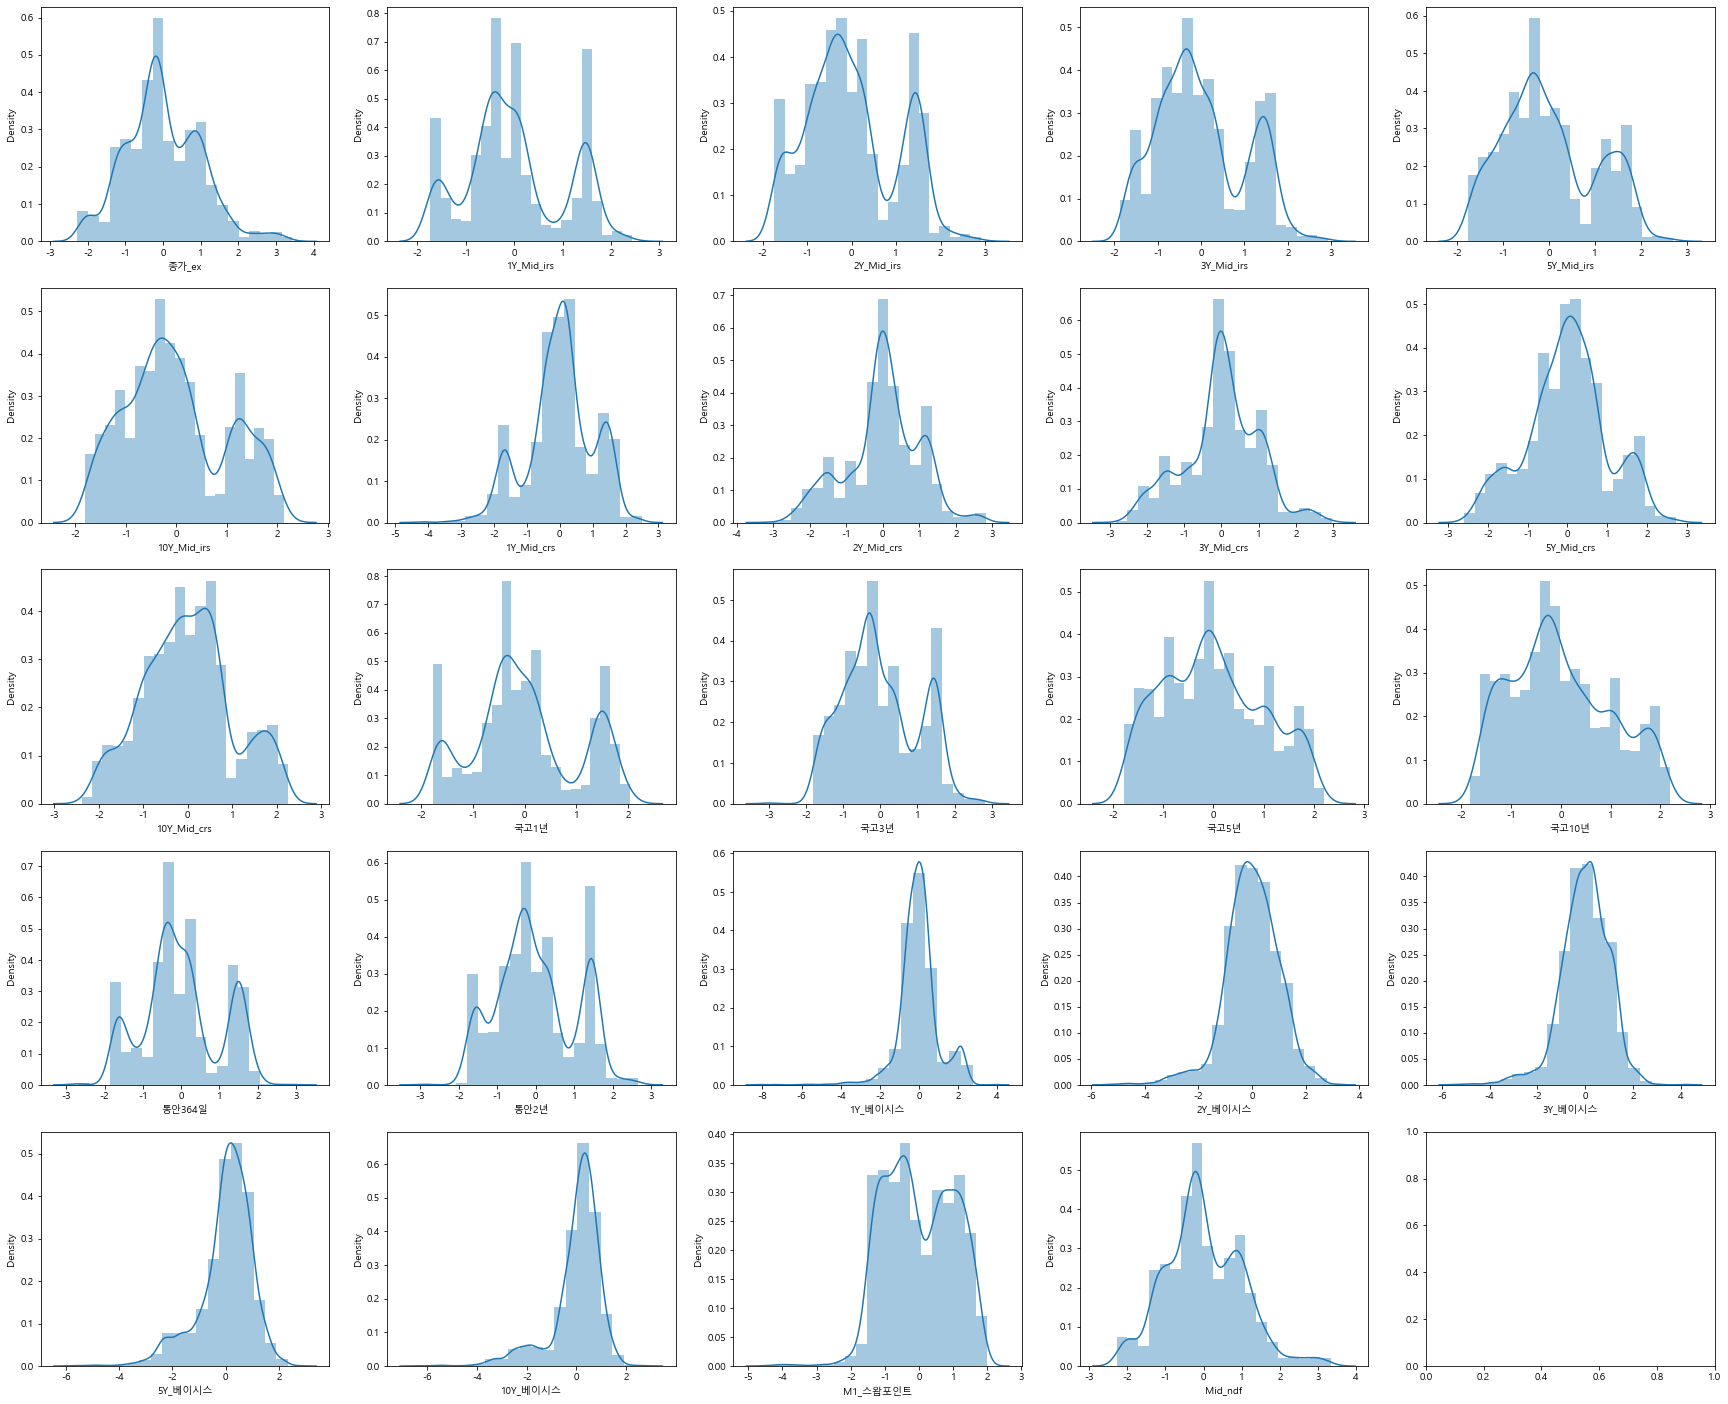

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    sns.distplot(df_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

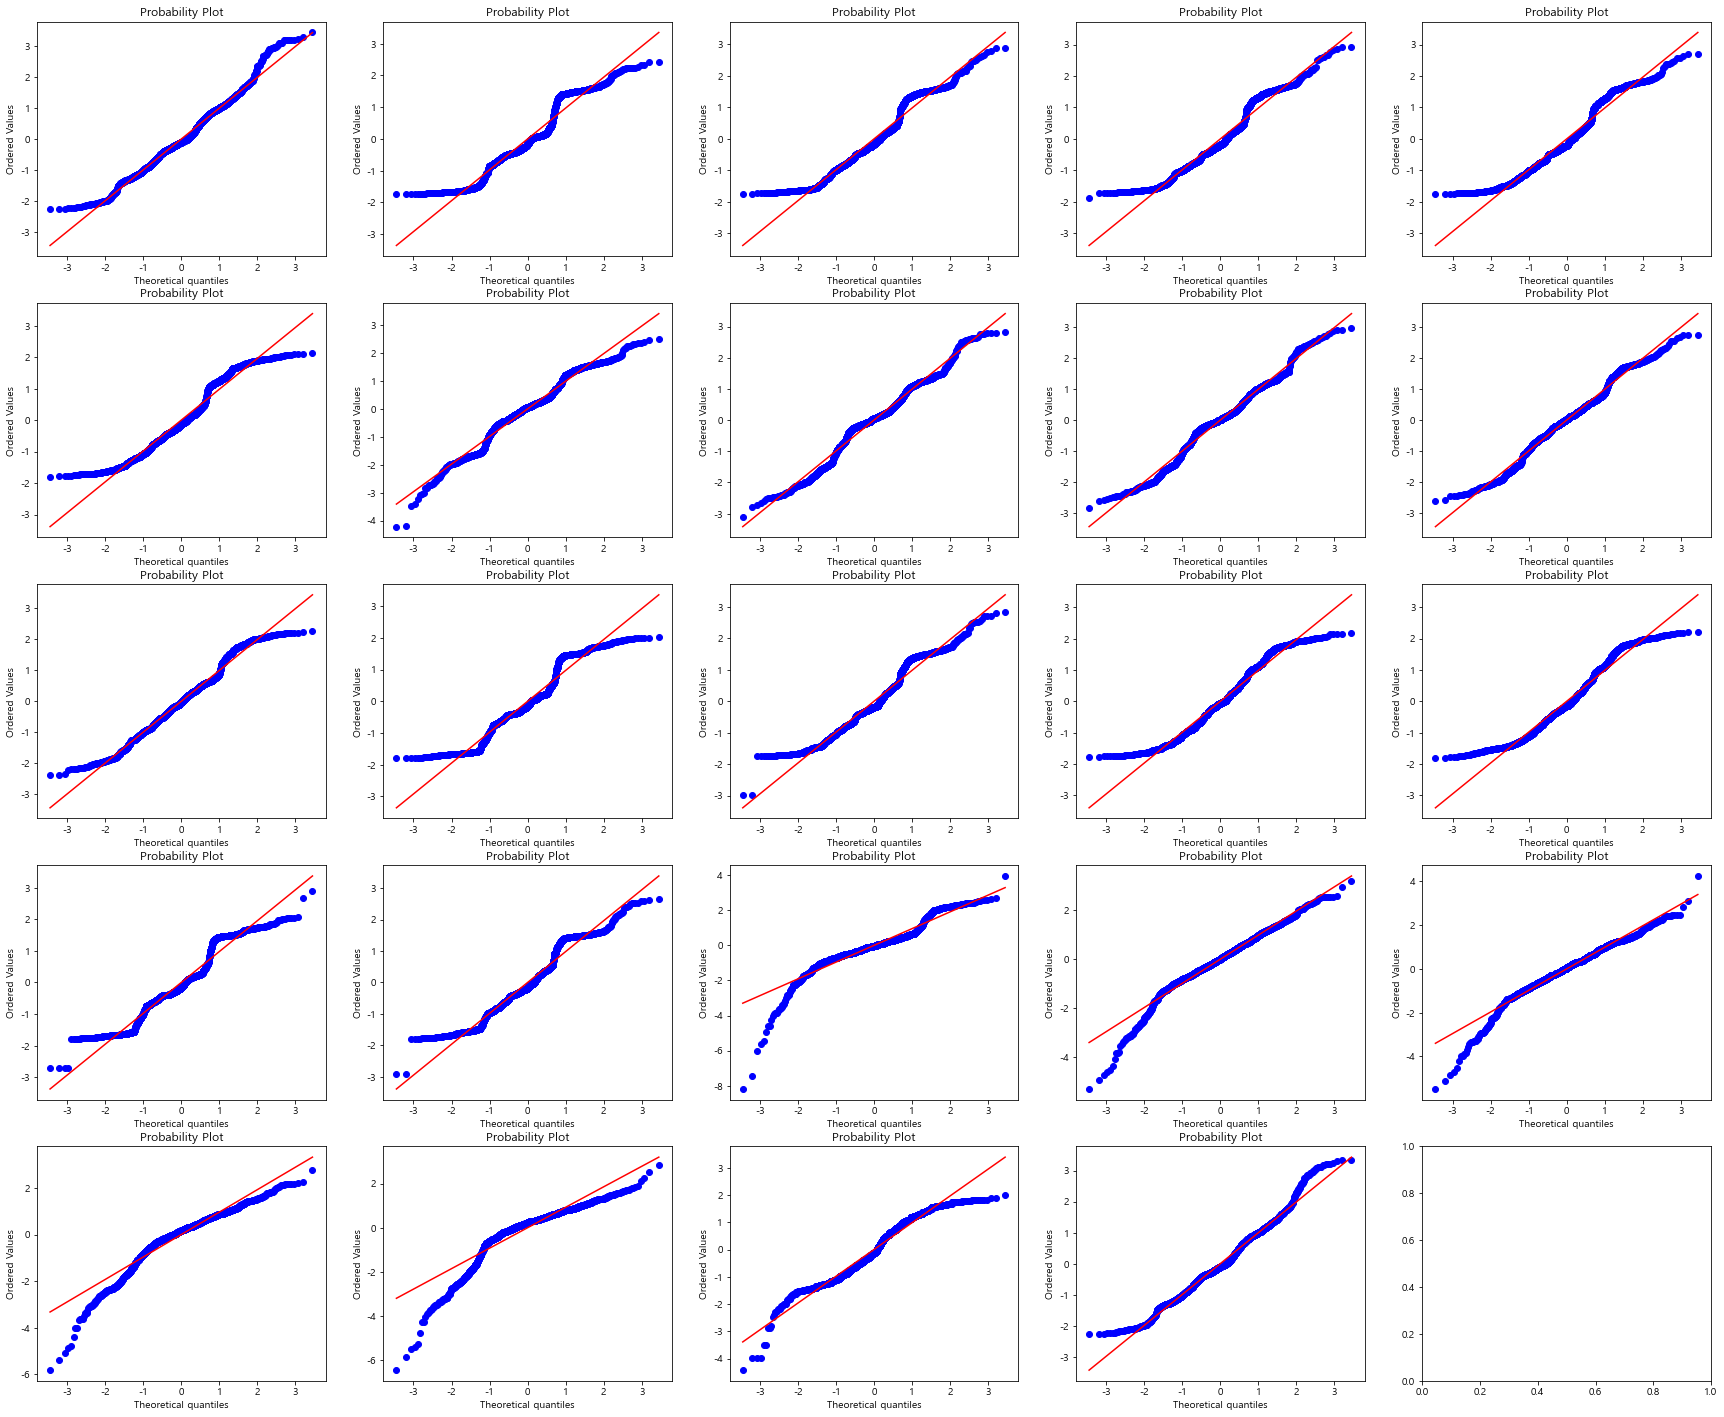

In [19]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    stats.probplot(df_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])

In [20]:
# 윈저라이징 시도 
# 망가지는거 확인
from scipy.stats.mstats import winsorize
for col in df.columns:
    df[col] = winsorize(df[col], limits= 0.005)

In [21]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 2.1087910131761985e-14
1Y_Mid_irs 6.64376467242943e-30
2Y_Mid_irs 2.2921074669367677e-26
3Y_Mid_irs 4.294769849945093e-26
5Y_Mid_irs 5.813558512237658e-26
10Y_Mid_irs 8.309026924969416e-26
1Y_Mid_crs 1.13103838277035e-20
2Y_Mid_crs 2.0502976876530976e-19
3Y_Mid_crs 2.1401299881449663e-17
5Y_Mid_crs 2.6484966902441155e-15
10Y_Mid_crs 9.34884239928201e-16
국고1년 2.4102364757282795e-29
국고3년 4.416627104497088e-25
국고5년 1.4091520799803905e-22
국고10년 1.3730912916276931e-24
통안364일 3.9966970428296833e-29
통안2년 3.936427934855702e-26
1Y_베이시스 5.3807073712561985e-31
2Y_베이시스 6.65115333756637e-18
3Y_베이시스 3.029166422442158e-19
5Y_베이시스 3.0375954221576135e-31
10Y_베이시스 5.554747112583575e-42
M1_스왑포인트 8.200806671908123e-25
Mid_ndf 1.5043759152896102e-14


In [22]:
#스케일링후 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 0.0
1Y_Mid_irs 0.0
2Y_Mid_irs 0.0
3Y_Mid_irs 0.0
5Y_Mid_irs 0.0
10Y_Mid_irs 0.0
1Y_Mid_crs 0.0
2Y_Mid_crs 0.0
3Y_Mid_crs 0.0
5Y_Mid_crs 0.0
10Y_Mid_crs 0.0
국고1년 0.0
국고3년 0.0
국고5년 0.0
국고10년 0.0
통안364일 0.0
통안2년 0.0
1Y_베이시스 0.0
2Y_베이시스 0.0
3Y_베이시스 0.0
5Y_베이시스 0.0
10Y_베이시스 0.0
M1_스왑포인트 0.0
Mid_ndf 0.0


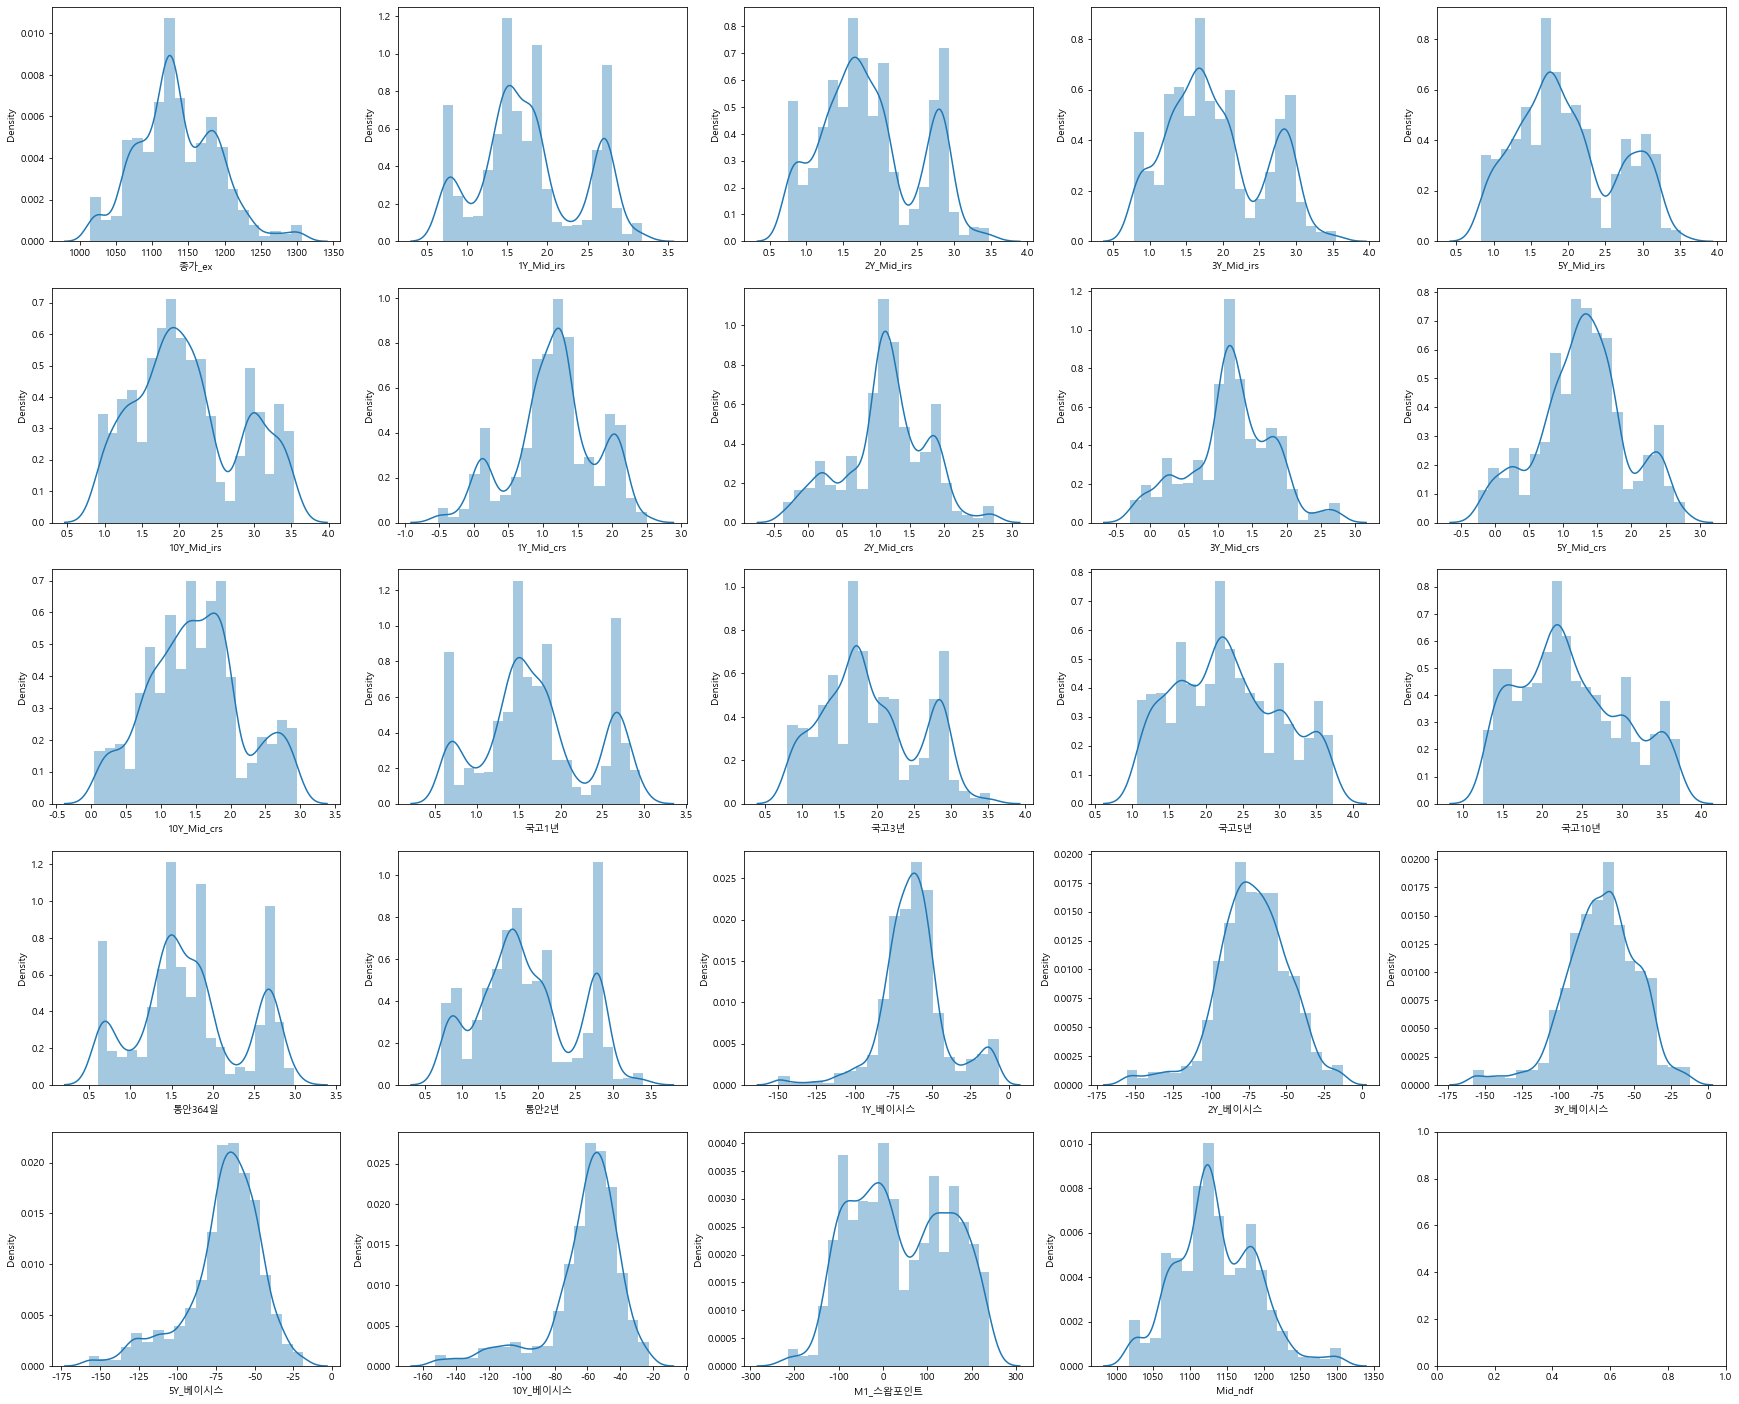

In [23]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

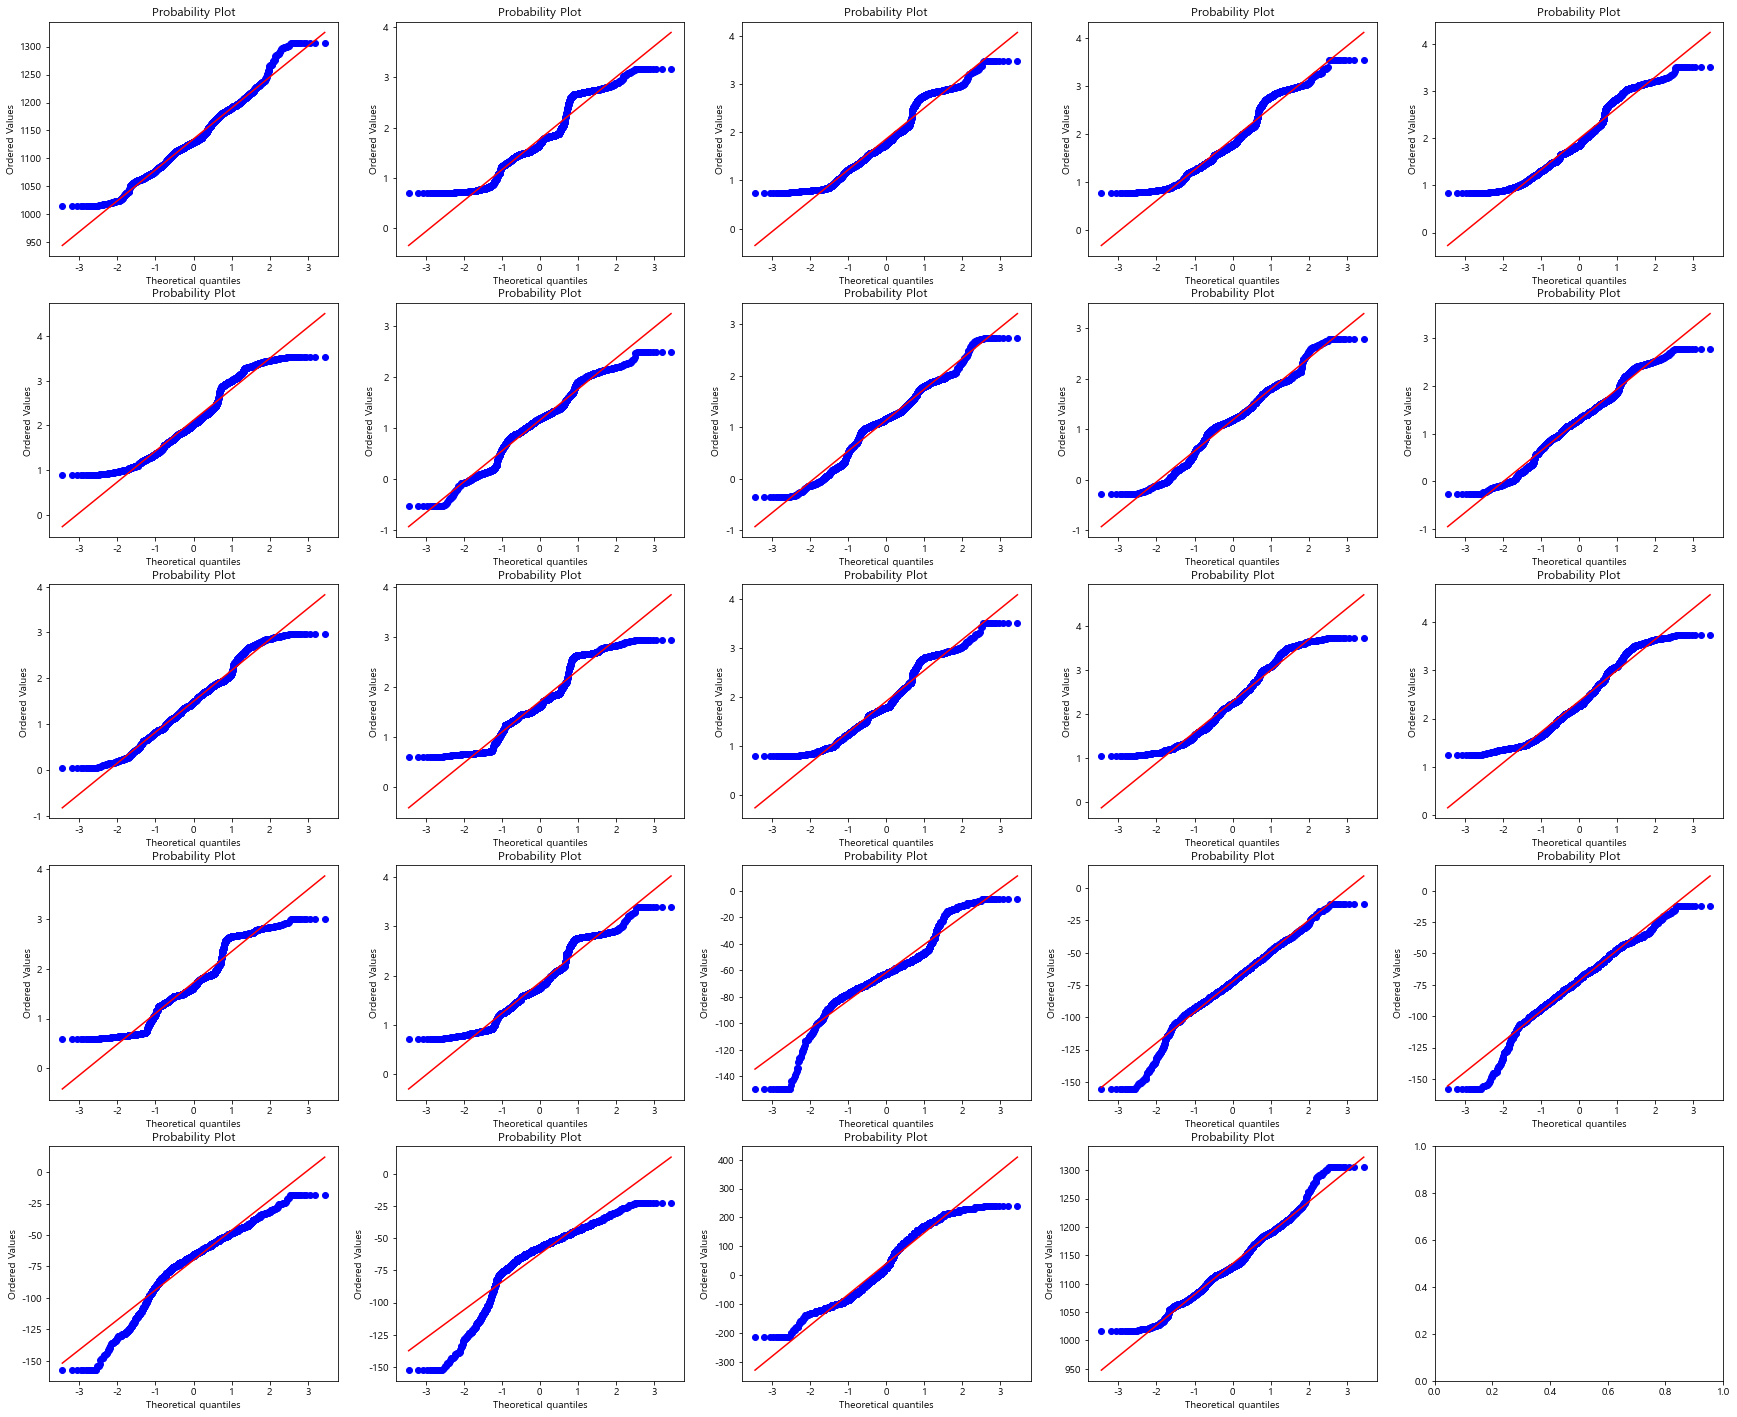

In [24]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])

In [25]:
# 정규성 없는거 확인 
# 스케일링 코드
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

scaler.fit(df)
df_Data_scaled= scaler.transform(df)
df_scaled = pd.DataFrame (data = df_Data_scaled, columns=df.columns)
df_scaled

,종가_ex,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,10Y_Mid_irs,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,...,국고10년,통안364일,통안2년,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,M1_스왑포인트,Mid_ndf
0,-0.150833,1.700312,1.342844,1.287815,1.178279,1.125230,1.517364,1.117282,1.023313,0.672926,...,1.199179,1.694236,1.513848,-0.657040,-0.840311,-0.862059,-1.427311,-1.953366,1.839290,-0.055947
1,-0.057144,1.652755,1.266403,1.211353,1.103344,1.054085,1.501039,1.166765,1.088159,0.734491,...,1.137855,1.647020,1.435711,-0.565218,-0.506055,-0.494721,-1.060103,-1.569283,1.839290,-0.023962
2,-0.001291,1.605198,1.220538,1.165476,1.058382,1.025627,1.484714,1.142024,1.055736,0.611361,...,1.030539,1.615543,1.420083,-0.473396,-0.443382,-0.453905,-1.264108,-2.124070,1.839290,0.049145
3,-0.105790,1.636903,1.251115,1.196061,1.088357,1.039856,1.484714,1.100788,1.007102,0.549796,...,1.030539,1.631282,1.435711,-0.565218,-0.631401,-0.657982,-1.508913,-2.337449,1.839290,-0.124485
4,-0.109394,1.652755,1.251115,1.196061,1.103344,1.068314,1.517364,1.125529,1.007102,0.442057,...,1.030539,1.615543,1.420083,-0.519307,-0.568728,-0.657982,-1.835321,-2.764208,1.839290,-0.115347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,3.088650,2.199659,2.099612,1.998912,1.710320,1.203489,2.186682,2.626512,2.482346,1.888833,...,1.306495,1.977530,1.920161,0.008669,0.914533,0.913410,0.347529,0.073737,-0.915138,3.106869
2456,3.088650,2.183807,2.069035,1.953035,1.665359,1.160802,2.186682,2.577029,2.433711,1.858051,...,1.260502,1.993269,1.920161,0.100491,0.872751,0.913410,0.388330,0.116413,-1.006953,3.106869
2457,3.088650,2.167955,1.992594,1.861280,1.575436,1.075428,2.186682,2.560535,2.417500,1.842660,...,1.168517,1.993269,1.904534,0.192313,1.039879,1.117487,0.592335,0.329792,-0.869231,3.106869
2458,2.904875,2.215511,2.053747,1.937742,1.650372,1.175031,2.186682,2.626512,2.482346,1.888833,...,1.291164,1.993269,1.951416,0.238224,1.039879,1.076672,0.510733,0.116413,-0.961046,3.106869


In [26]:
#스케일링 전 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in df.columns:
    a = stats.shapiro(df[i])
    p = a.pvalue   
    print(i,p)

종가_ex 2.1087910131761985e-14
1Y_Mid_irs 6.64376467242943e-30
2Y_Mid_irs 2.2921074669367677e-26
3Y_Mid_irs 4.294769849945093e-26
5Y_Mid_irs 5.813558512237658e-26
10Y_Mid_irs 8.309026924969416e-26
1Y_Mid_crs 1.13103838277035e-20
2Y_Mid_crs 2.0502976876530976e-19
3Y_Mid_crs 2.1401299881449663e-17
5Y_Mid_crs 2.6484966902441155e-15
10Y_Mid_crs 9.34884239928201e-16
국고1년 2.4102364757282795e-29
국고3년 4.416627104497088e-25
국고5년 1.4091520799803905e-22
국고10년 1.3730912916276931e-24
통안364일 3.9966970428296833e-29
통안2년 3.936427934855702e-26
1Y_베이시스 5.3807073712561985e-31
2Y_베이시스 6.65115333756637e-18
3Y_베이시스 3.029166422442158e-19
5Y_베이시스 3.0375954221576135e-31
10Y_베이시스 5.554747112583575e-42
M1_스왑포인트 8.200806671908123e-25
Mid_ndf 1.5043759152896102e-14


In [27]:
#스케일링후 ks테스트
for i in df.columns:
    a = kstest(df[i],'norm')
    p = a.pvalue
    print(i,p)

종가_ex 0.0
1Y_Mid_irs 0.0
2Y_Mid_irs 0.0
3Y_Mid_irs 0.0
5Y_Mid_irs 0.0
10Y_Mid_irs 0.0
1Y_Mid_crs 0.0
2Y_Mid_crs 0.0
3Y_Mid_crs 0.0
5Y_Mid_crs 0.0
10Y_Mid_crs 0.0
국고1년 0.0
국고3년 0.0
국고5년 0.0
국고10년 0.0
통안364일 0.0
통안2년 0.0
1Y_베이시스 0.0
2Y_베이시스 0.0
3Y_베이시스 0.0
5Y_베이시스 0.0
10Y_베이시스 0.0
M1_스왑포인트 0.0
Mid_ndf 0.0


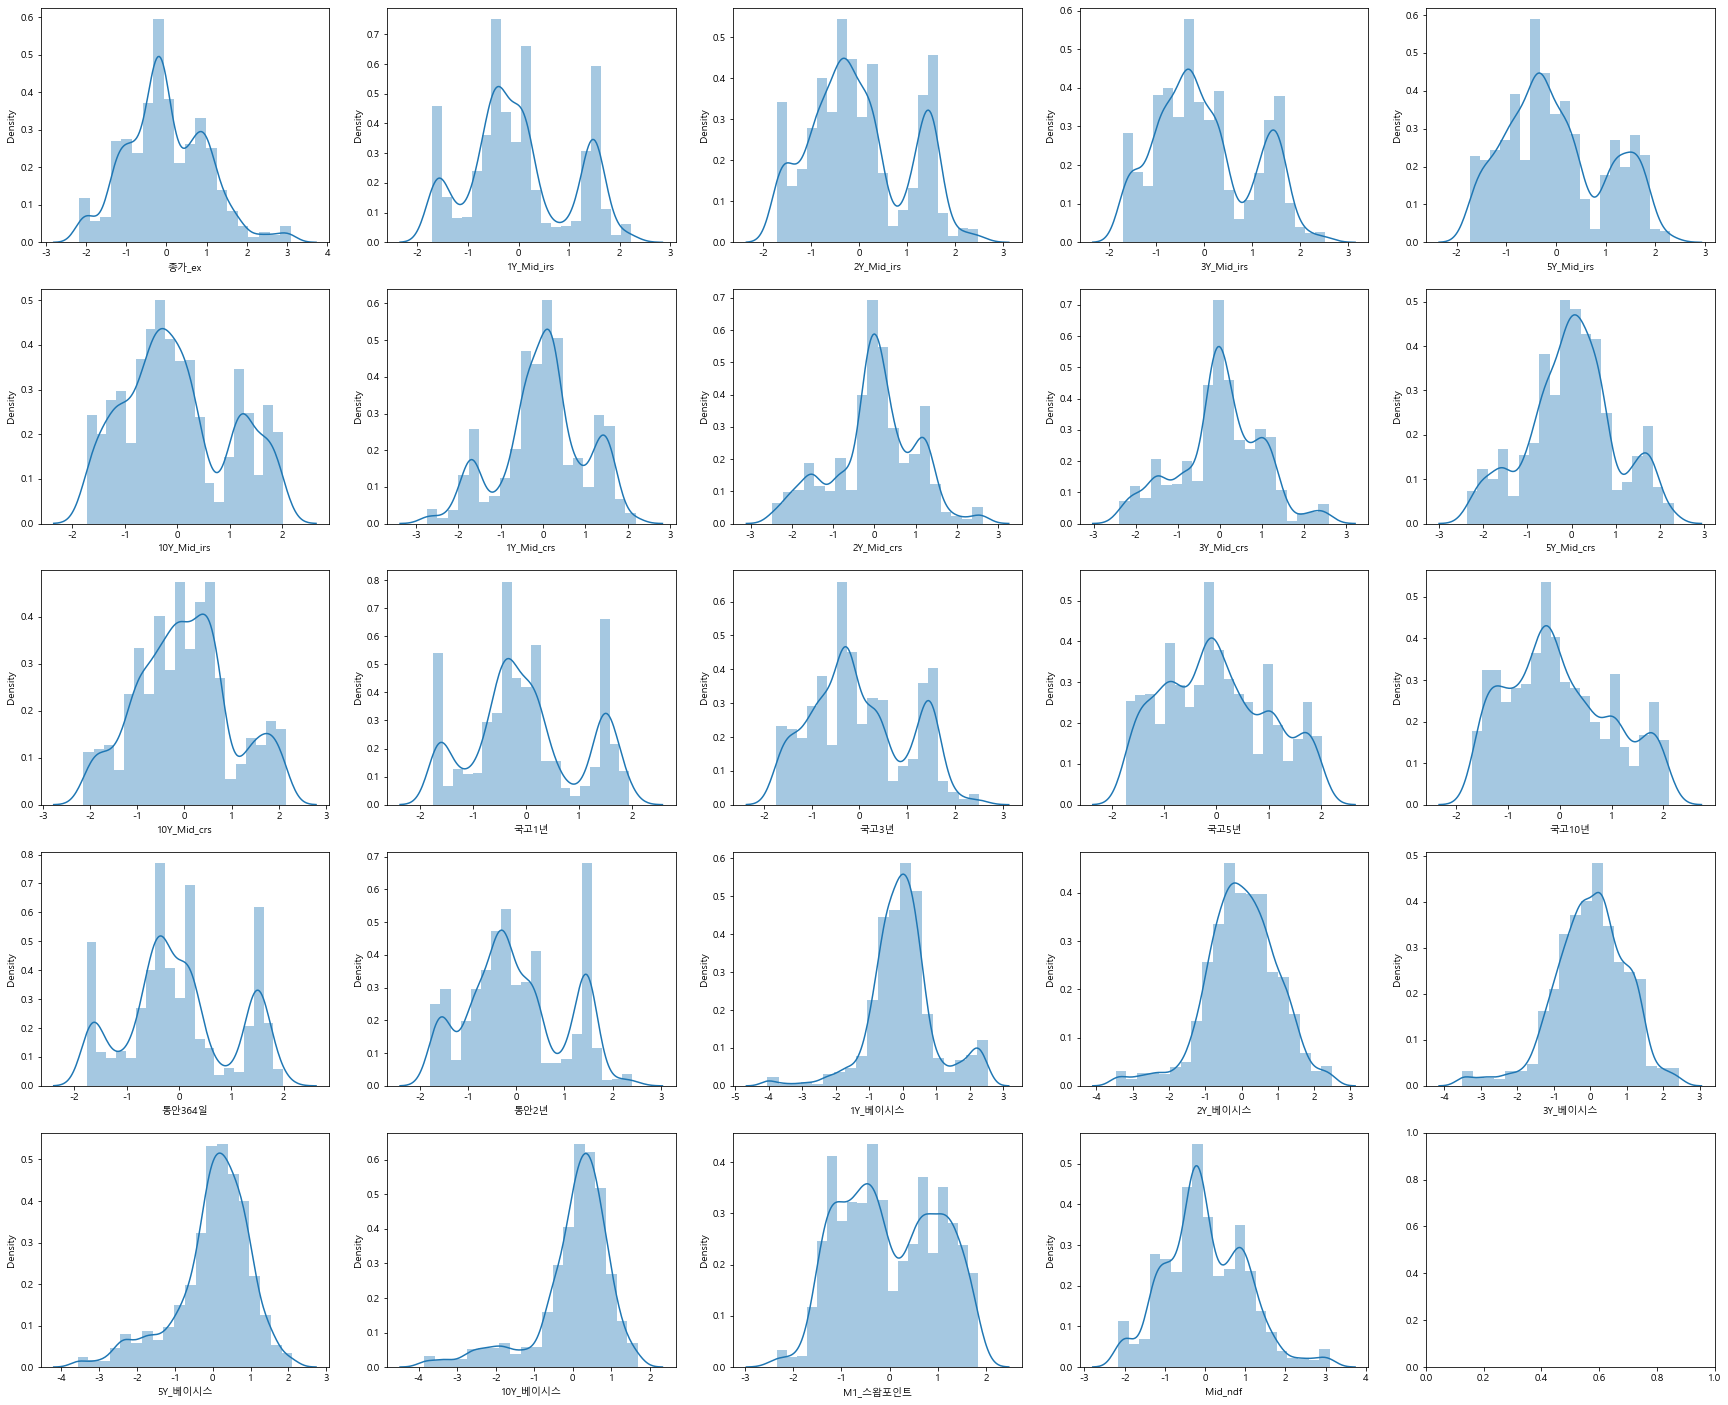

In [28]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    sns.distplot(df_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

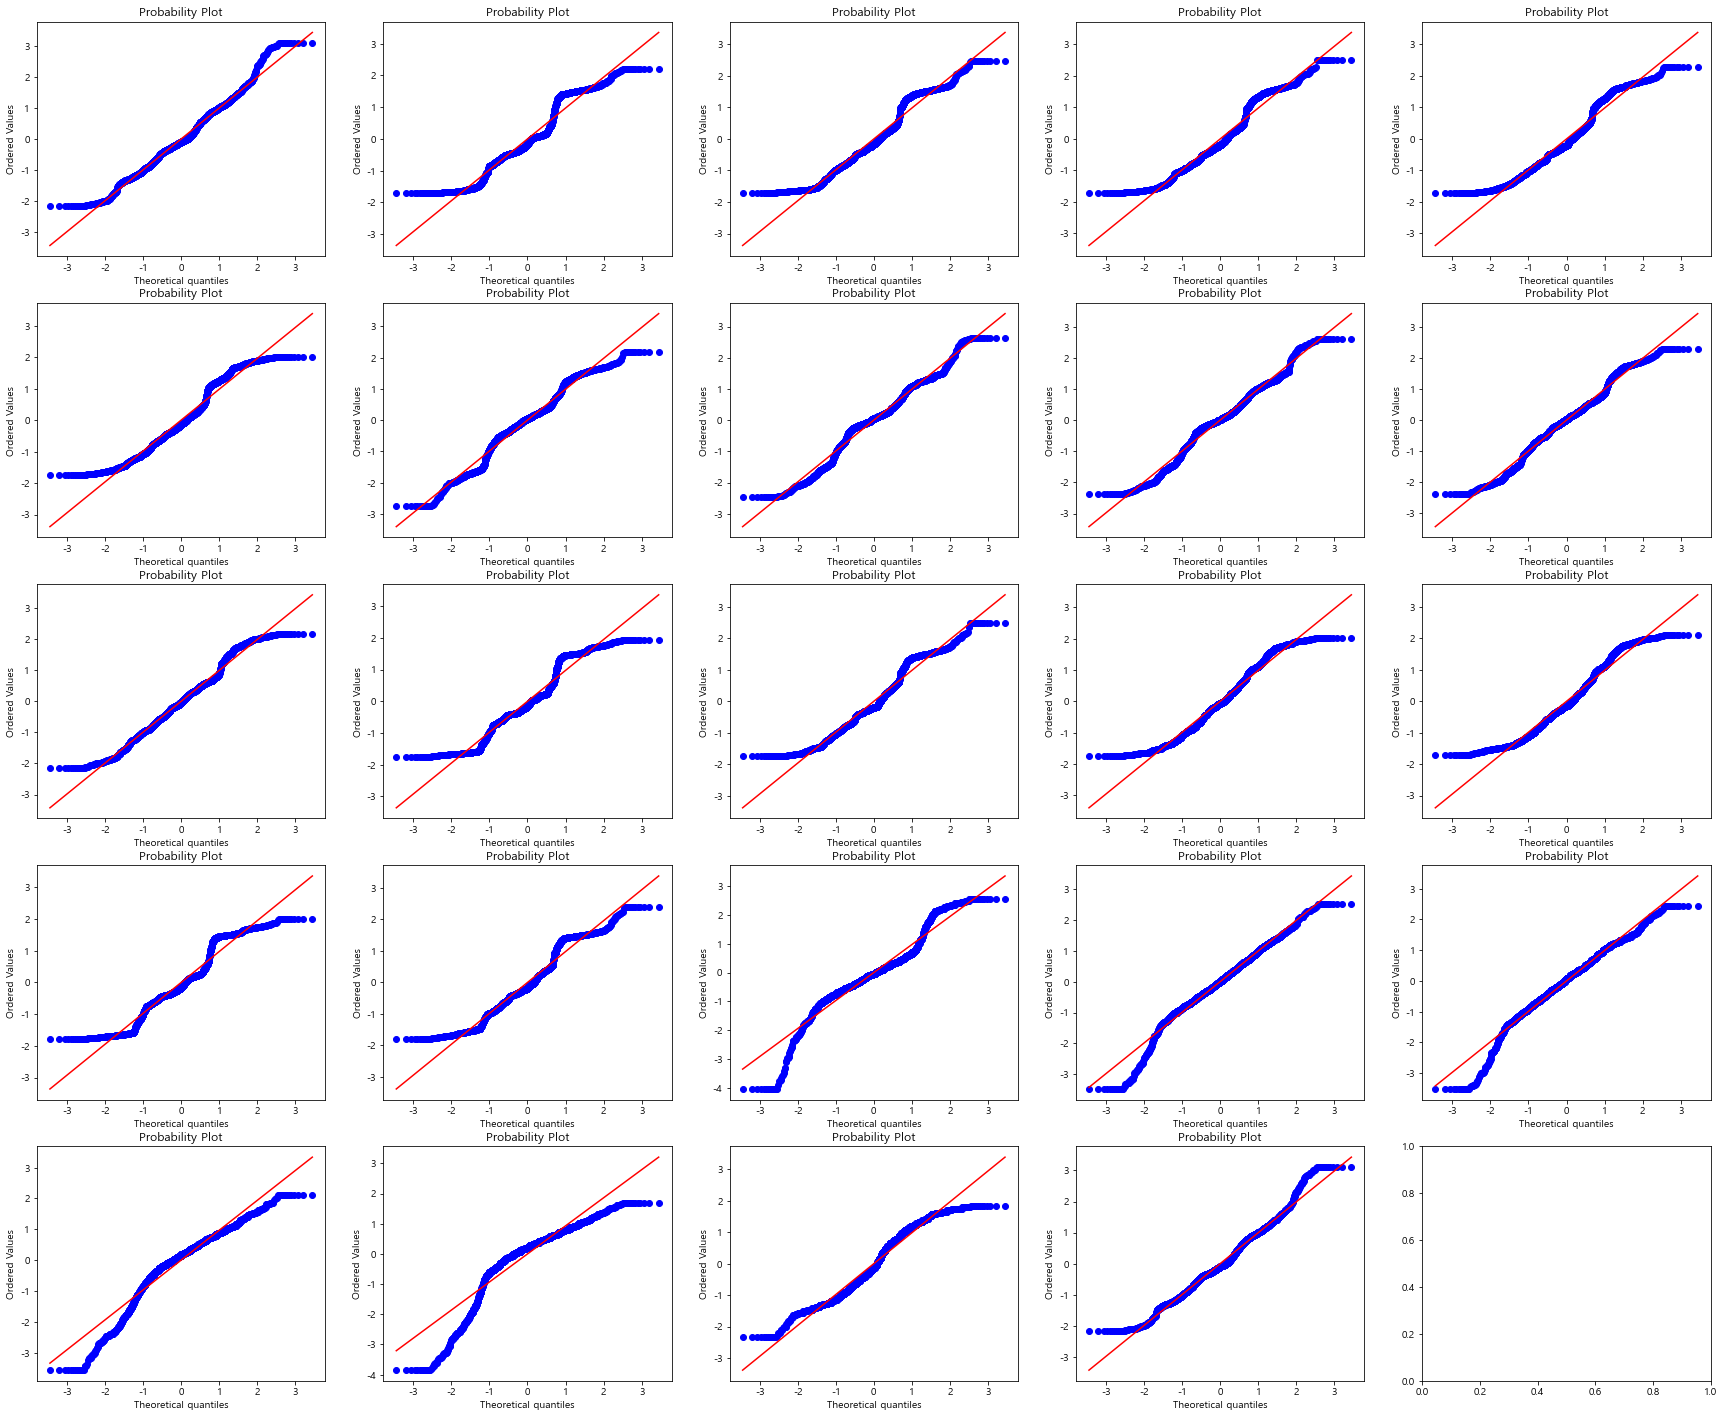

In [29]:
## qq plot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_scaled.columns):
    stats.probplot(df_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])